Снежко Лев, Лабораторная работа №5

Разработать программу, иллюстрирующую результаты применения порядково-статистичеcких фильтров для бинарных и полутоновых изображений для квадратных окон размера 3x3, 5x5, 7x7.

In [1]:
import numpy as np

#Все порядковые статистики для окна (2r+1)x(2r+1)
def orders(a, r):
    padded = (a.shape[0] + 2*r+1, a.shape[1] + 2*r+1)
    res = np.zeros(padded)
    res[r:r+a.shape[0], r:r+a.shape[1]] = a
    return np.array([[np.sort(res[i:i+2*r+1,j:j+2*r+1], axis=None) for j in range(a.shape[1])] for i in range(a.shape[0])])

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.any(arr < 255, axis = 2)

def load_image_gray(path):
    image = Image.open(path)
    arr = np.asarray(image)
    return np.sum(arr, axis=2)/(255 * 3)

imags = [load_image_gray("svin.jpg"), load_image_gray("tree.png"),
         load_image('im2.png'), load_image('im1.png')]
radis = [1, 2, 3]
sizes = [3, 5, 7]

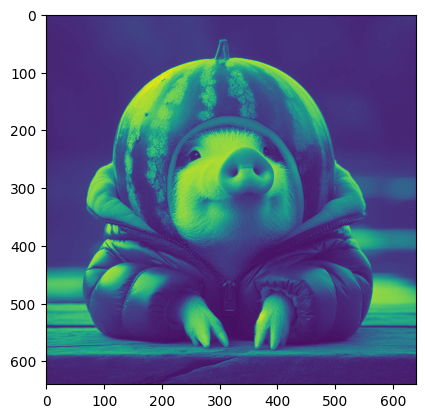

window: 3x3


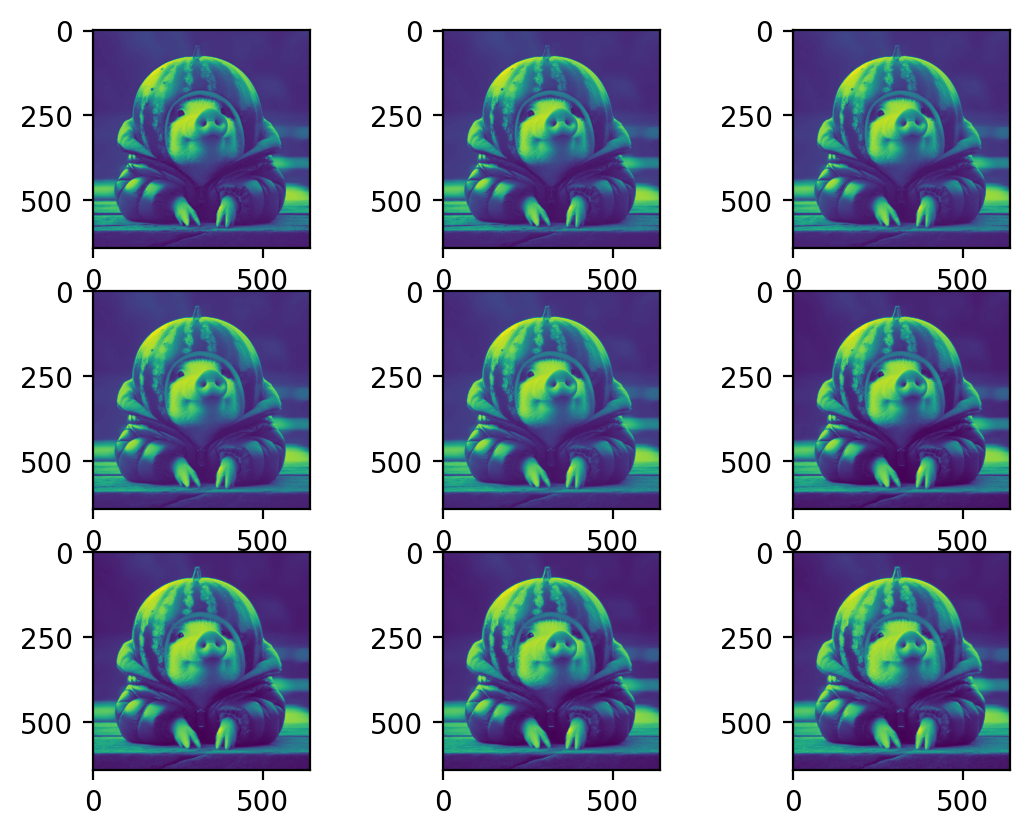

window: 5x5


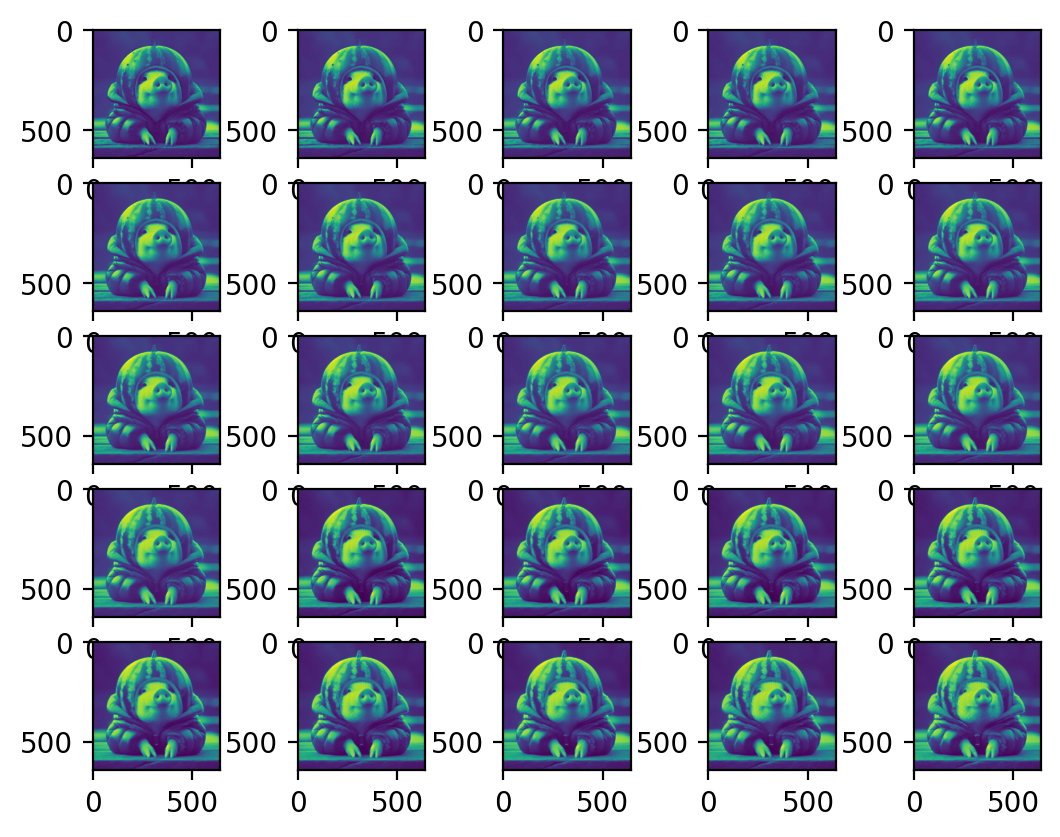

window: 7x7


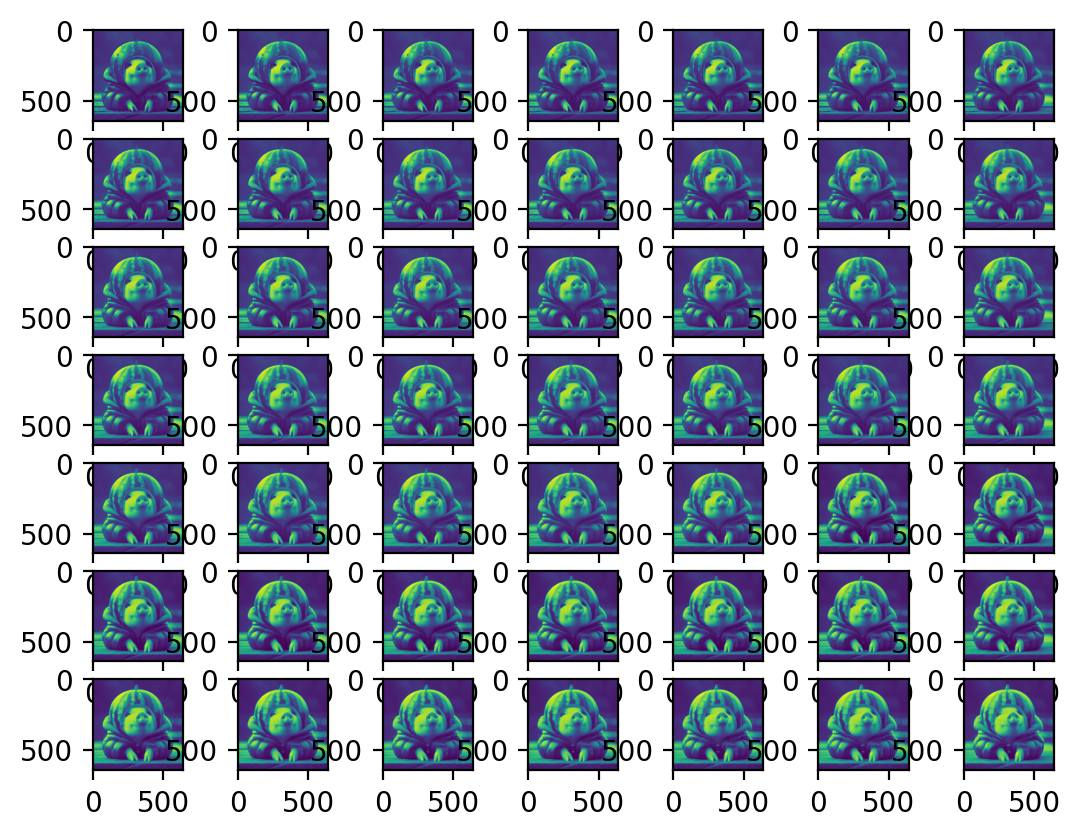

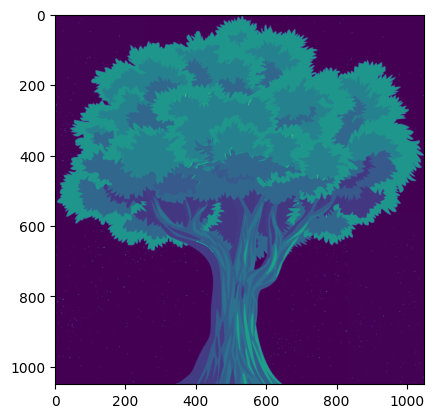

window: 3x3


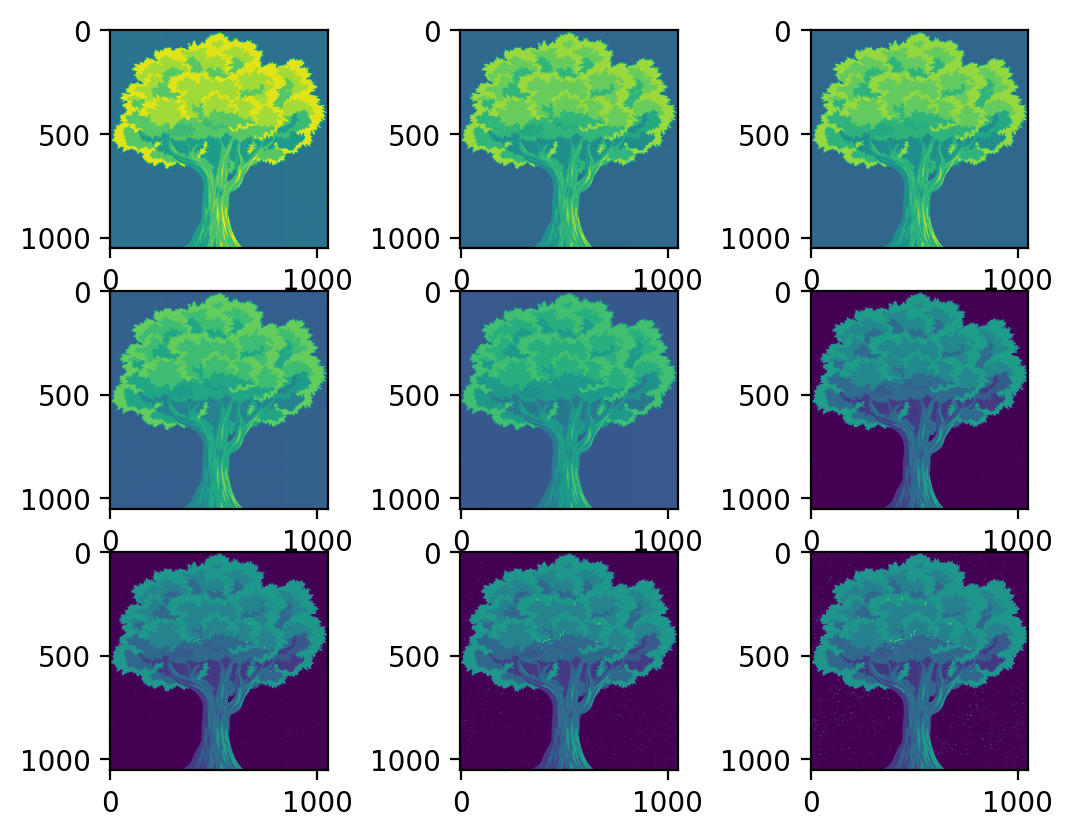

window: 5x5


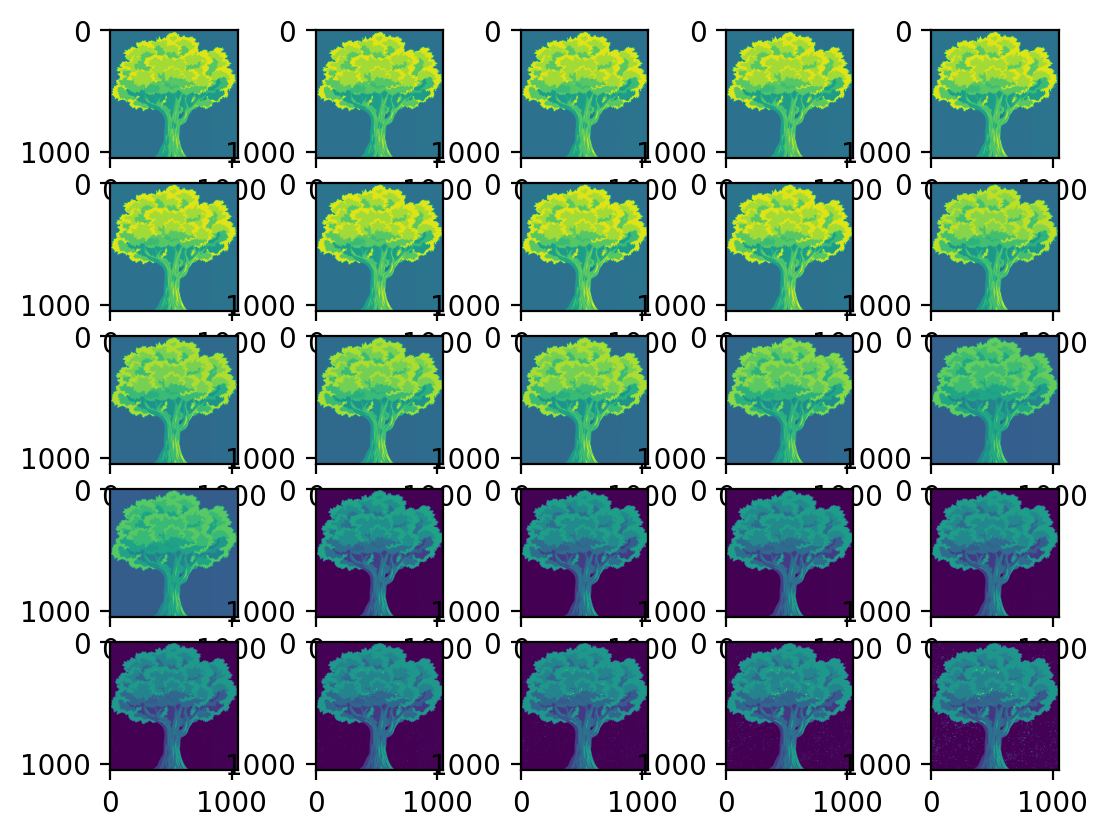

window: 7x7


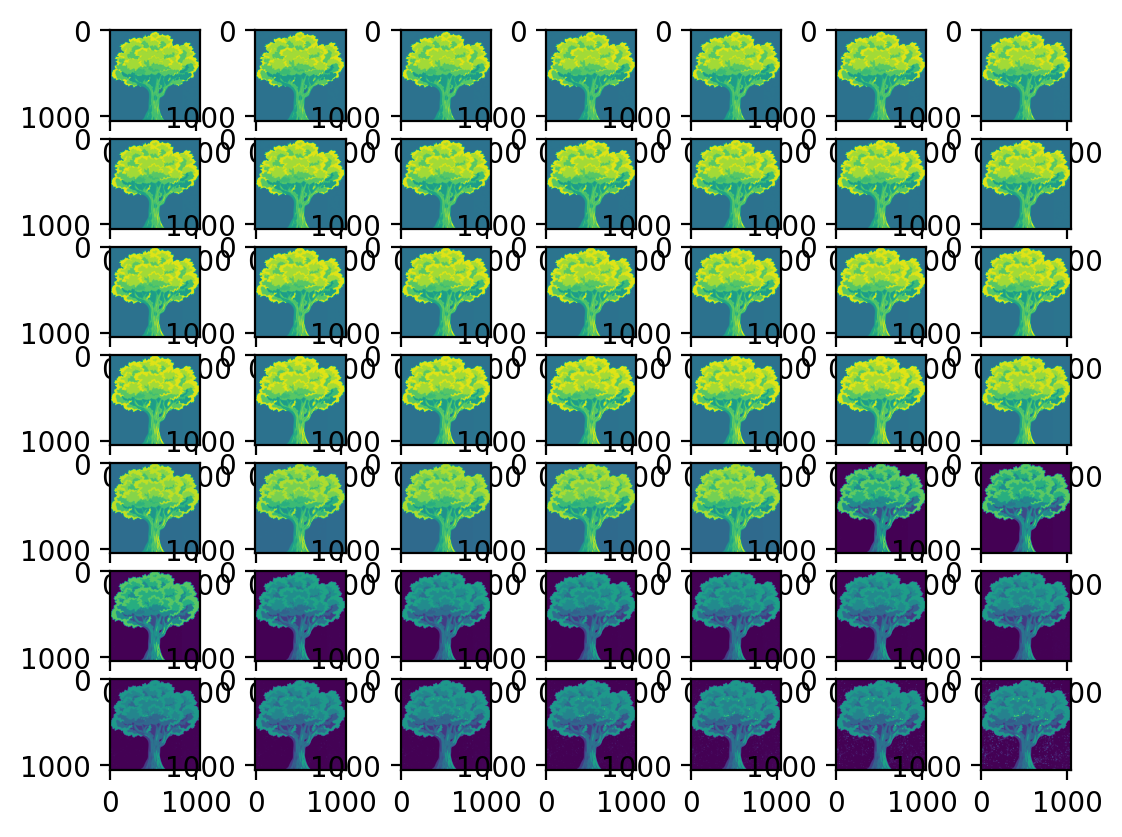

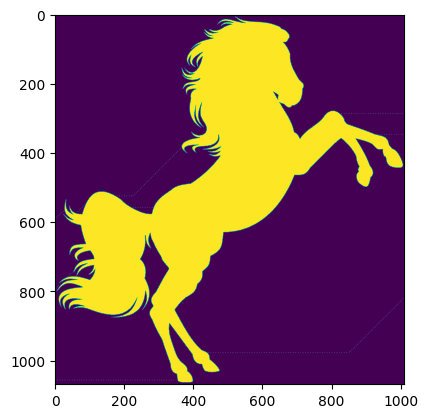

window: 3x3


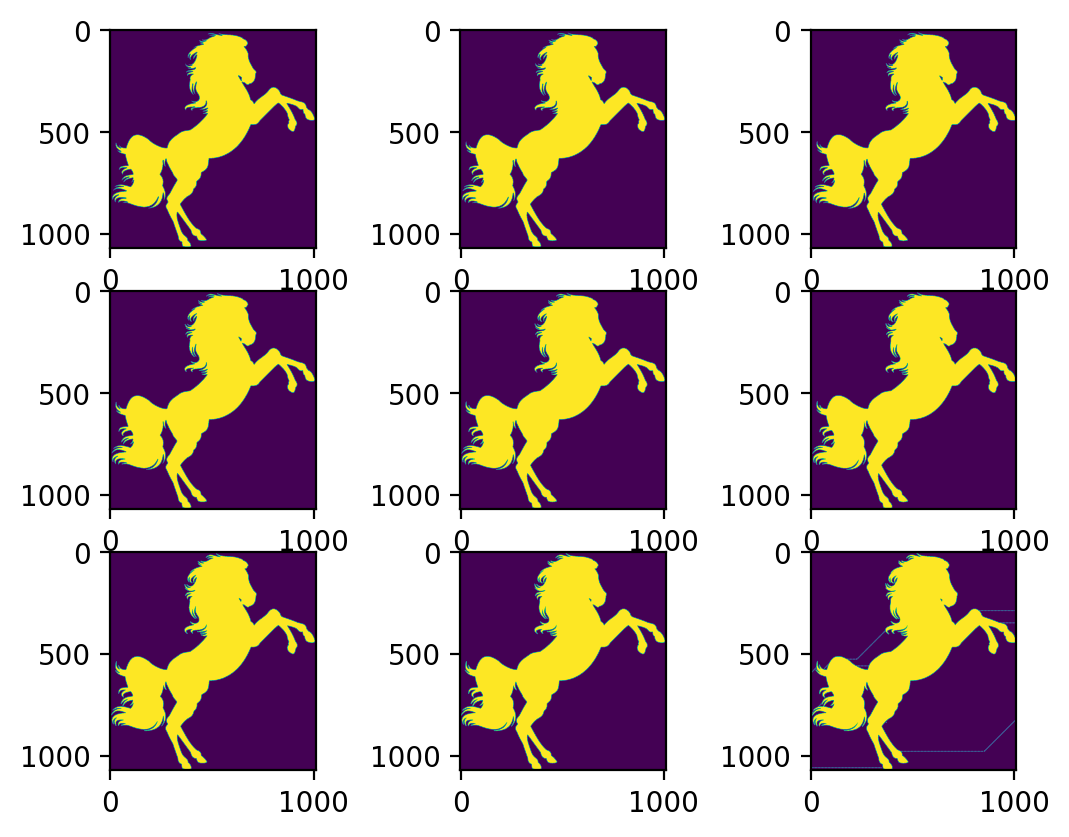

window: 5x5


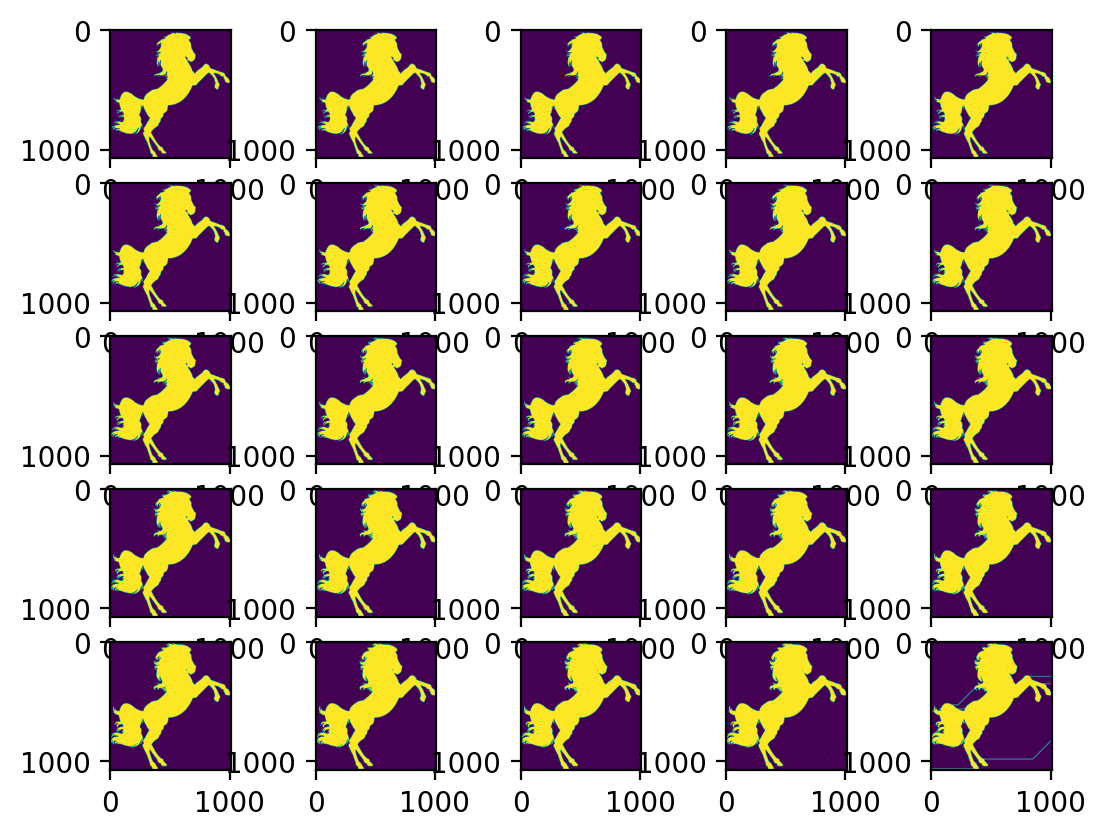

window: 7x7


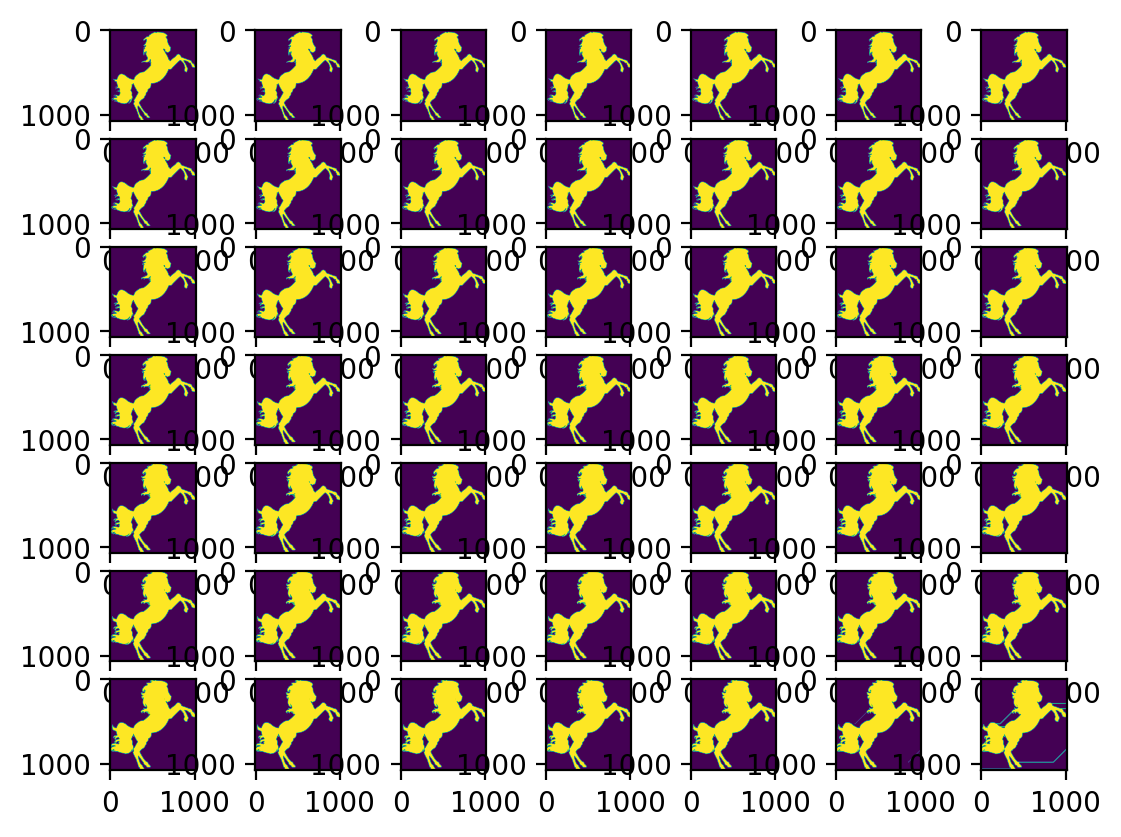

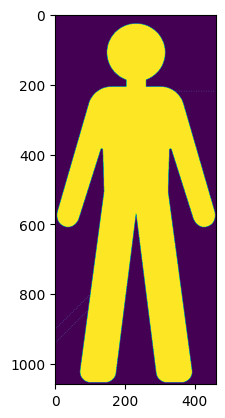

window: 3x3


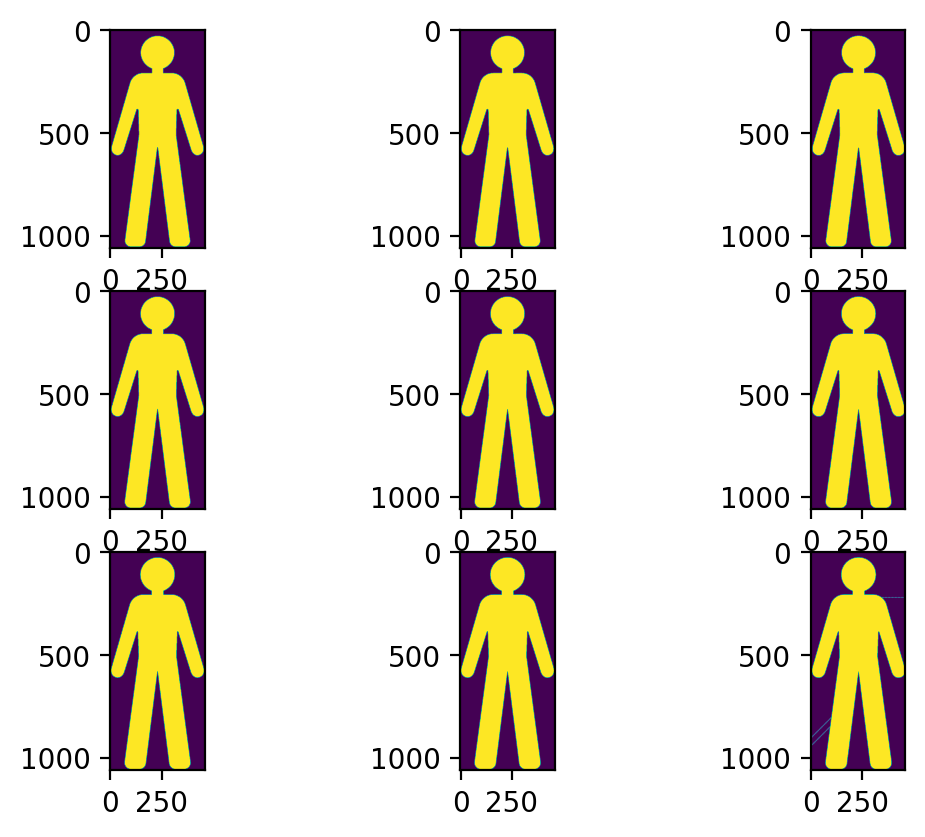

window: 5x5


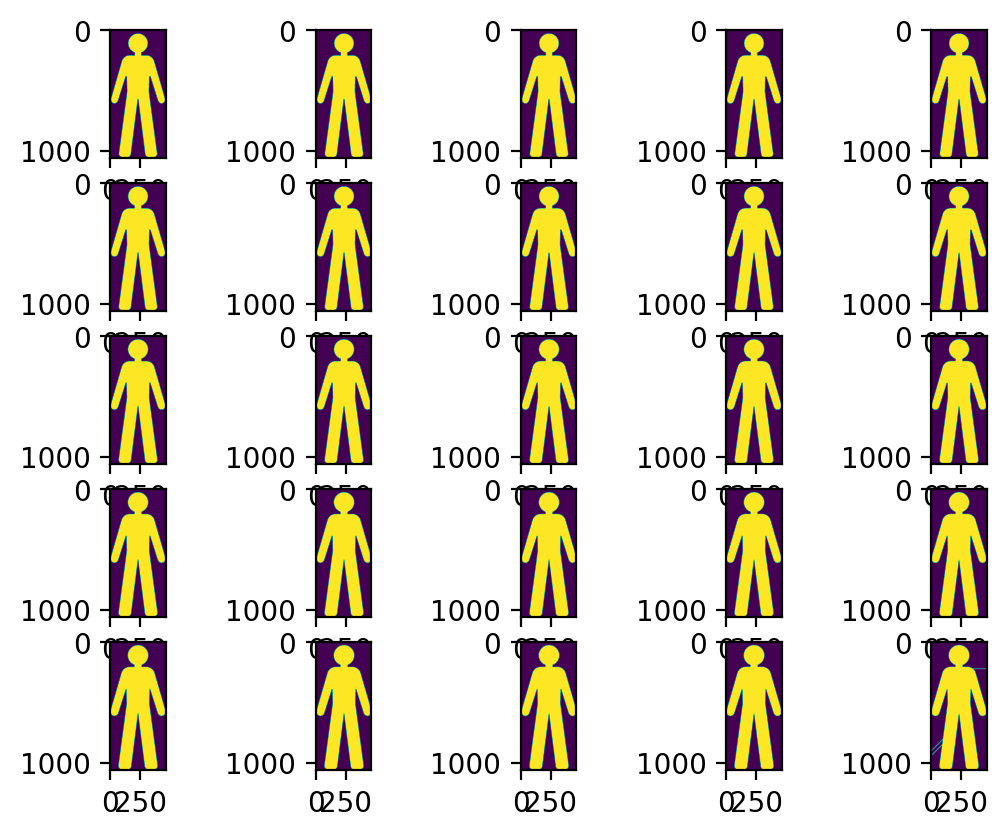

window: 7x7


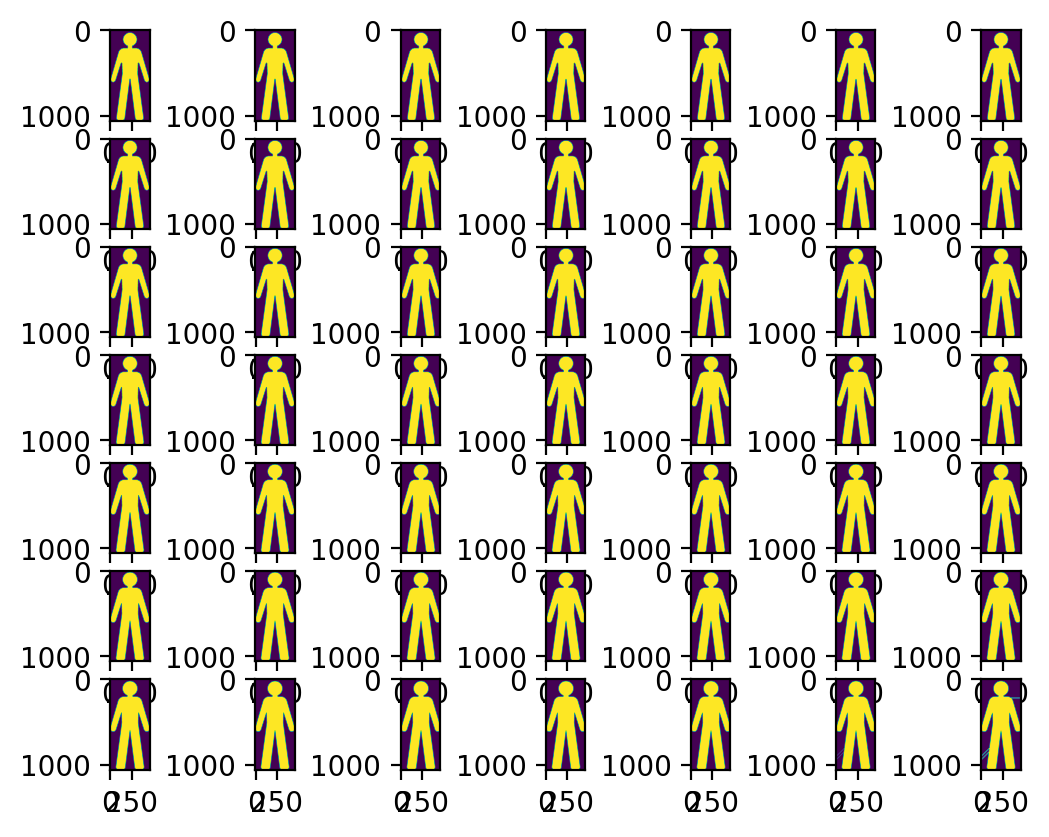

In [3]:
for im in imags:
    plt.figure(dpi=100)
    plt.imshow(im)
    plt.show()
    for i in range(len(radis)):
        print(f"window: {2*radis[i]+1}x{2*radis[i]+1}")
        plt.figure(dpi = 200)
        ord = orders(im, radis[i])
        for j in range(ord.shape[2]):
            plt.subplot(sizes[i], sizes[i], j + 1)
            plt.imshow(ord[:, :, j])
        plt.show()